<h1 style="Comic Sans MS; text-align: center; color: #FFC300">Final Project</h1>
<h3 id="step1" style="font-family: Comic Sans MS; color: #68FF33">1. Exploratory Data Analysis</h3>
<p style="color: pink">The goals of the exploratory data analysis are:</p>
<ul style="color: pink">
    <li>to better understand the data,</li>
    <li>to evaluate if the given dataset is suitable for the K-Means clustering task.</li>
</ul>
<p style="color: pink">We need to:</p>
<ol style="color: pink">
    <li>Load the given Banknote authentication dataset.</li>
    <li>Calculate statistical measures, e.g. mean and standard deviation.</li>
    <li>Visualise the data as we consider fit.</li>
    <li>Evaluate if the given dataset is suitable for the K-Means clustering task.</li>
    <li>Write a short description of the dataset and our evaluation of its suitability for the K-Means clustering task.</li>
</ol>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.cluster import KMeans

In [3]:
file_path = 'C:/Users/Jorge Payà/Desktop/4GeeksAcademy/DSML Bootcamp/KMeans-project/data/raw/Banknote-authentication-dataset.csv'
df = pd.read_csv(file_path)
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      1372 non-null   float64
 1   V2      1372 non-null   float64
dtypes: float64(2)
memory usage: 21.6 KB


(None,
         V1      V2
 0  3.62160  8.6661
 1  4.54590  8.1674
 2  3.86600 -2.6383
 3  3.45660  9.5228
 4  0.32924 -4.4552)

<p style="color: pink">The dataset contains 1,372 entries with two continuous numerical attributes: V1 (variance of Wavelet Transformed image) and V2 (skewness of Wavelet Transformed image). There are no missing values, and both columns are of type float64. Next, I'll compute statistical measures such as the mean and standard deviation.</p>

In [4]:
df.describe()

,V1,V2
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


<p style="color: pink">The statistical summary shows:
<ul style="color: pink">
    <li>V1 (variance): Mean = 0.43, Std = 2.84, Range = [-7.04, 6.82]</li>
    <li>V2 (skewness): Mean = 1.92, Std = 5.87, Range = [-13.77, 12.95]</li>
</ul>
<p style="color: pink">Both attributes have a wide range and significant variability, which suggests that clustering might be feasible. Let's plot the data to assess its distribution and potential clustering patterns.</p>

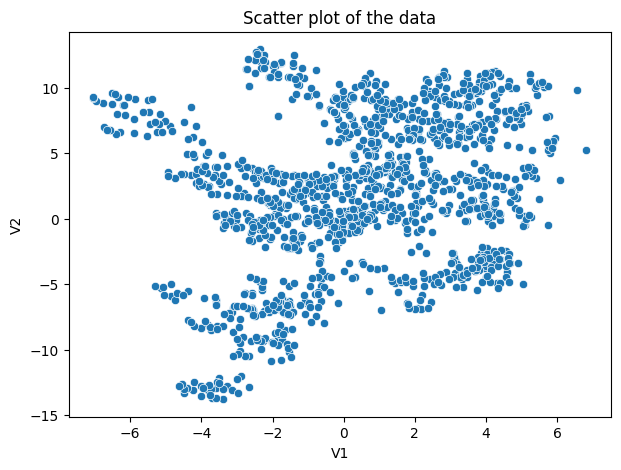

In [ ]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='V1', y='V2')
plt.title('Scatter plot of the data')
plt.show()


<p style="color: pink">Below we check for outliers by using a boxplot and z-scores and can confirm there are no outliers in the data:</p>

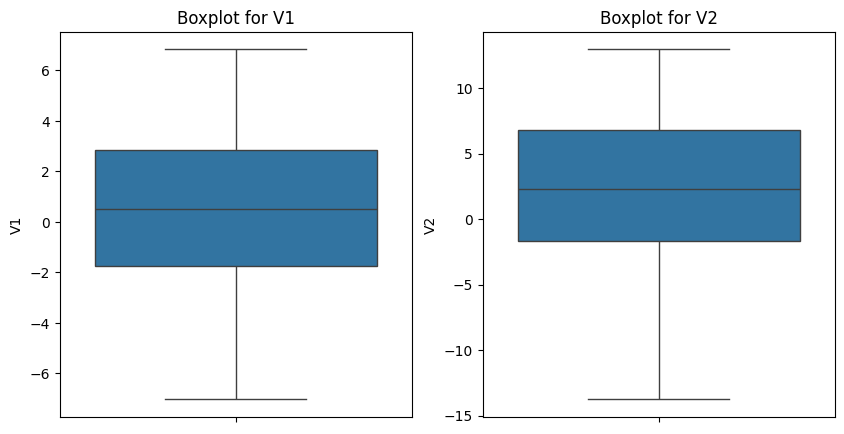

In [10]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['V1'])
plt.title('Boxplot for V1')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['V2'])
plt.title('Boxplot for V2')
plt.show()

In [ ]:
z_scores = np.abs(zscore(df[['V1', 'V2']]))
outliers = (z_scores > 3).any(axis=1)
print(f'Number of outliers: {outliers.sum()}')

Number of outliers: 0


<h3 id="step1" style="font-family: Comic Sans MS; color: #68FF33">2. Determine Optimal Number of Clusters (k)</h3>
<p style="color: pink">Now we determine the optimal number of clusters using the elbow method which consists of computing the sum of squared distances (inertia) for different k values and plotting an elbow curve.</p>

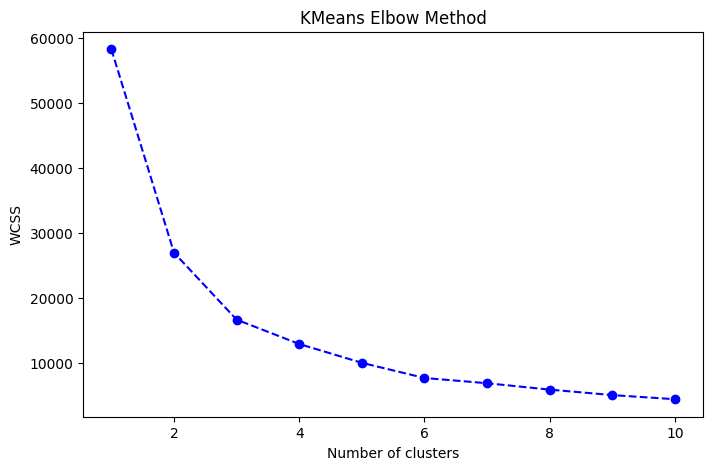

In [16]:
X = df[['V1', 'V2']]
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('KMeans Elbow Method')
plt.show()


<p style="color: pink">The optimal number of clusters seems to be k=2. Let's proceed with clustering task.</p>

<h3 id="step1" style="font-family: Comic Sans MS; color: #68FF33">3. Clustering</h3>
<p style="color: pink">The goals here are the following:</p>
<ol style="color: pink">
    <li>run K-means on the given dataset</li>
    <li>visualise the results.</li>
    <li>re-run K-means several times and visualise the results. </li>
    <li>compare the results: is the K-means algorithm stable?</li>
    <li>describe the results.</li>
</ol>

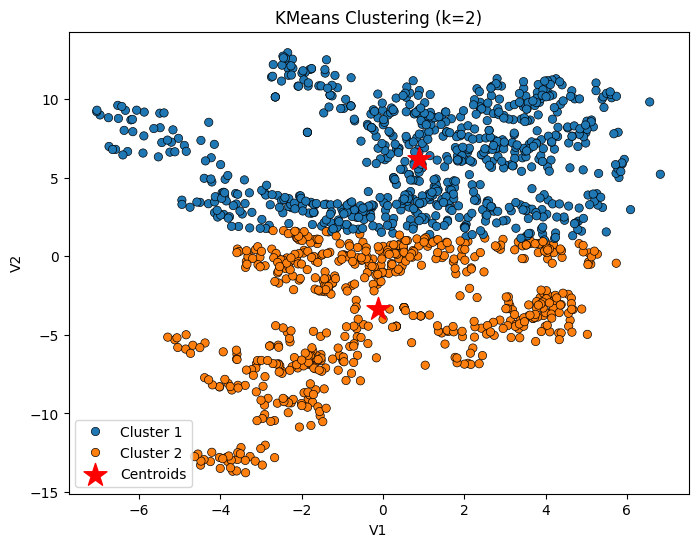

In [30]:
# Apply KMeans and map clusters directly
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
df['Cluster'] = pd.Series(kmeans.fit_predict(X)).map({0: 'Cluster 1', 1: 'Cluster 2'})

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='V1', y='V2', hue='Cluster', marker='o', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('KMeans Clustering (k=2)')
plt.legend()
plt.show()


<p style="color: pink">Since KMeans uses random initialization for cluster centroid we need to run it multiple times with different initializations (random seeds) to check whether the clustering results remain consistent:</p>

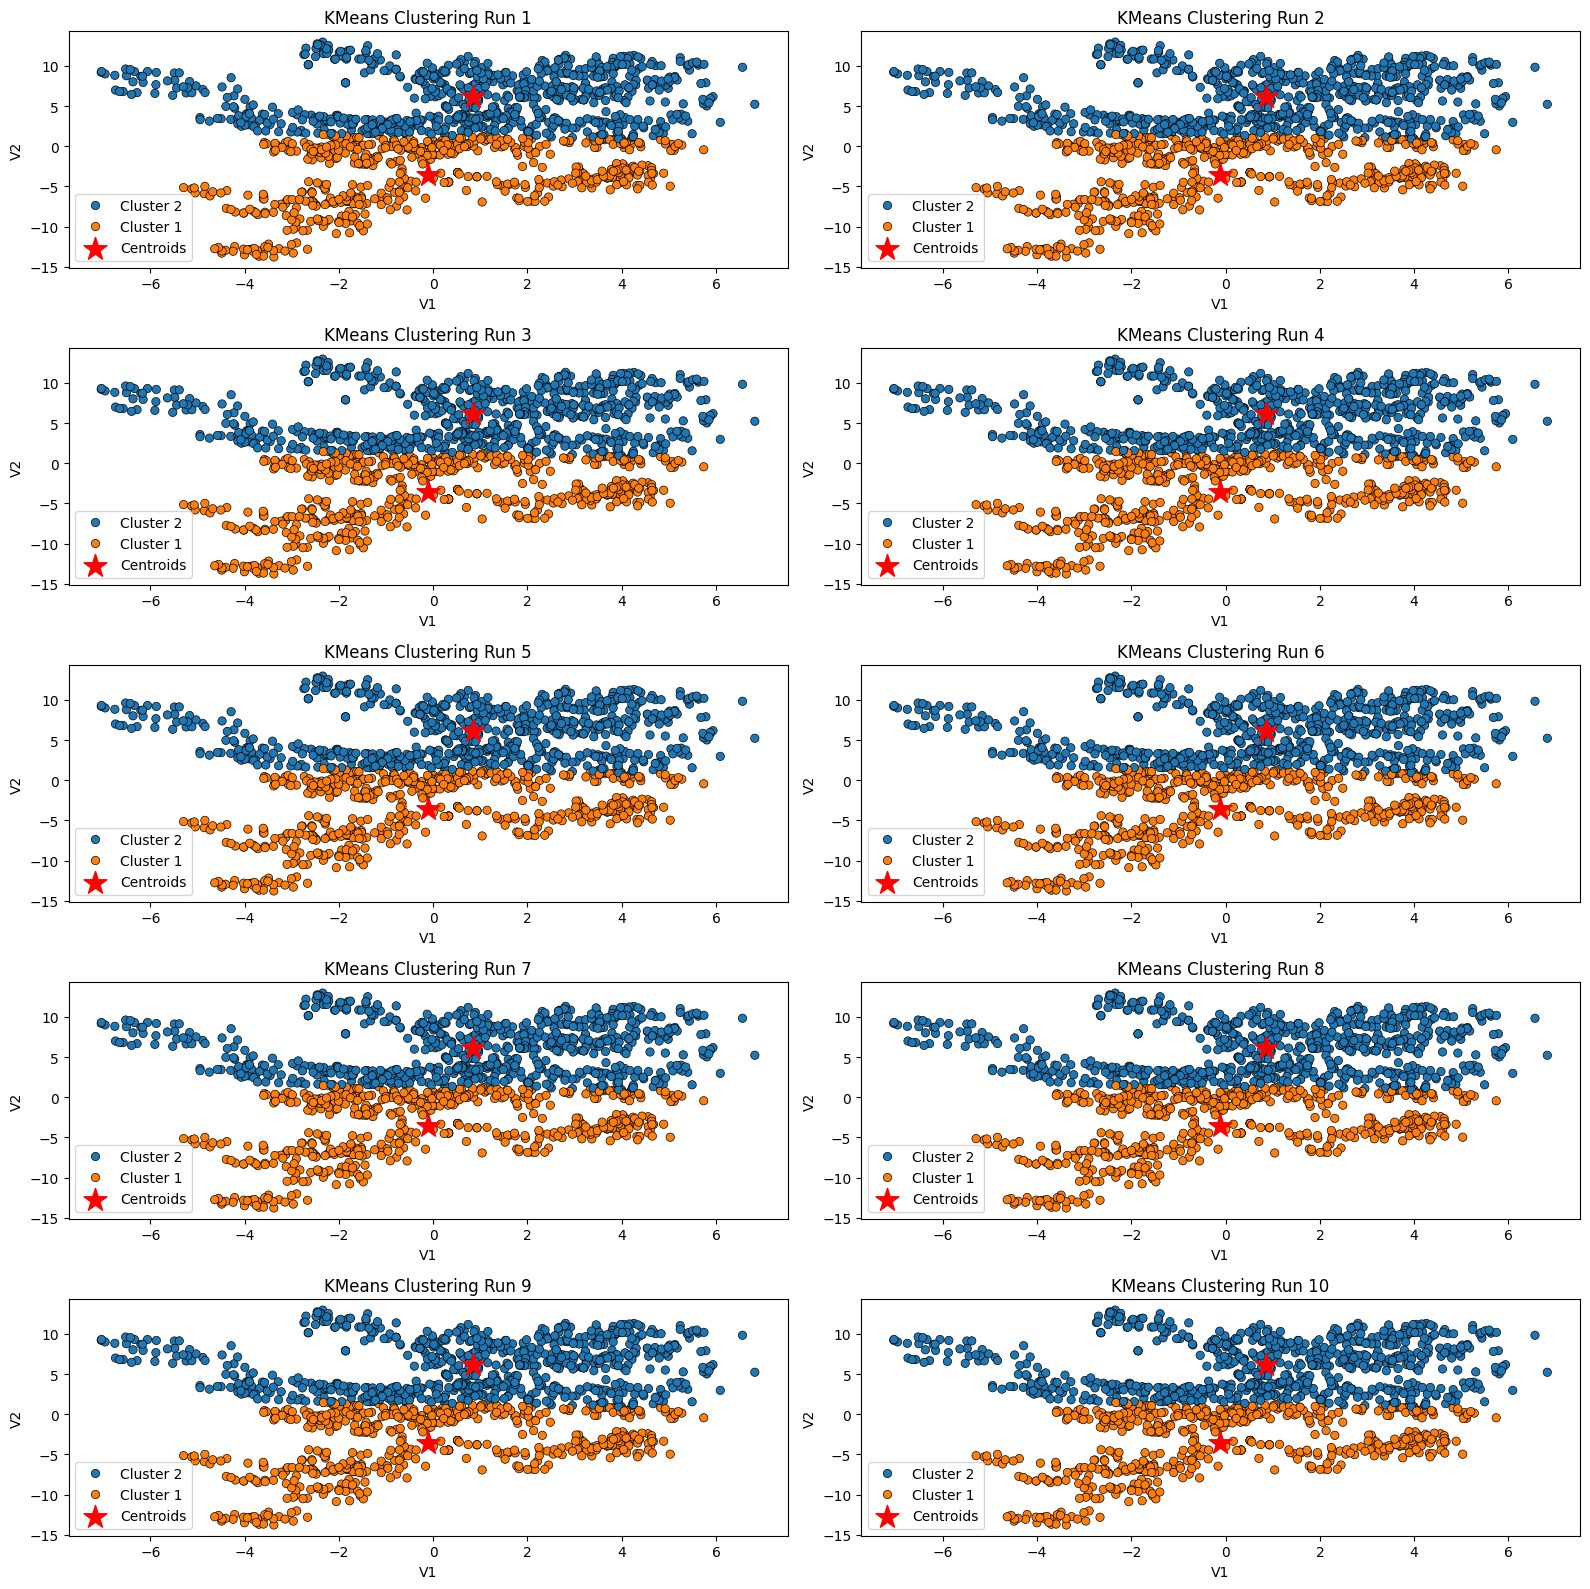

In [36]:
# Number of runs
n_runs = 10
# Set up a figure for plotting
plt.figure(figsize=(16, 16))
# Loop through each KMeans run
for i in range(n_runs):
    # Apply KMeans with multiple initializations (using n_init=10)
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42, n_init=10)
    df['Cluster'] = pd.Series(kmeans.fit_predict(X)).map({0: 'Cluster 1', 1: 'Cluster 2'})

    # Plotting each run in a subplot
    plt.subplot(5, 2, i+1)  # 5 rows, 2 columns, current plot index
    sns.scatterplot(data=df, x='V1', y='V2', hue='Cluster', marker='o', edgecolor='k')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
    
    # Labels and title for each subplot
    plt.xlabel('V1')
    plt.ylabel('V2')
    plt.title(f'KMeans Clustering Run {i+1}')
    plt.legend()

# Adjust layout for clarity
plt.tight_layout()
plt.show()

<p style="color: pink">After running KMeans 10 times with different initializations, we can conclude that the algorithm is stable, as the resulting centroids are consistent across the multiple runs.</p>